No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


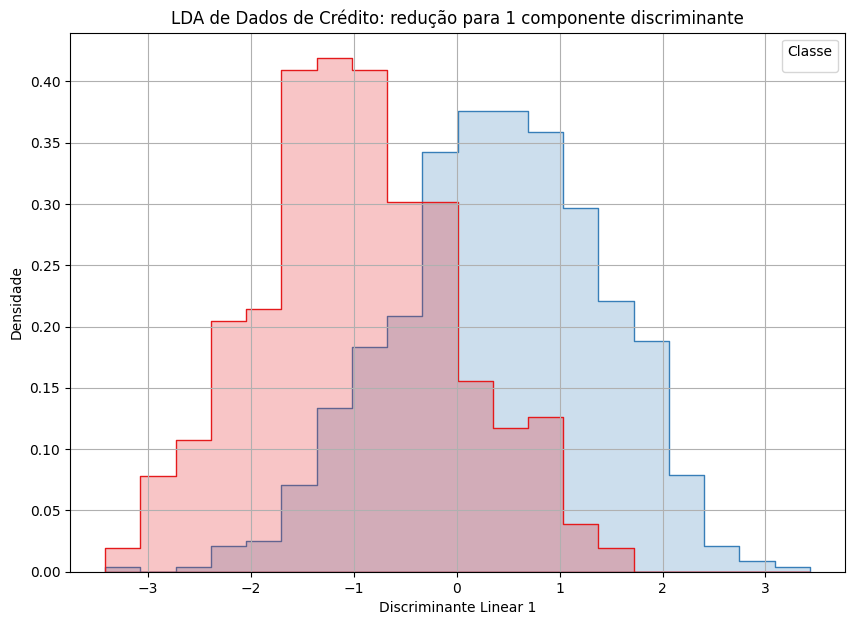

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
columns = ['Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose', 'Credit_amount',
           'Savings_account_bonds', 'Present_employment_since', 'Installment_rate_in_percentage_of_disposable_income',
           'Personal_status_and_sex', 'Other_debtors_guarantors', 'Present_residence_since', 'Property', 'Age_in_years',
           'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank', 'Job', 'Number_of_people_being_liable_to_provide_maintenance_for',
           'Telephone', 'Foreign_worker', 'Good_Bad']

data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Pré-processamento dos dados
data['Good_Bad'] = data['Good_Bad'].map({1: 1, 2: 0})  # 1 para bom pagador, 0 para mau pagador
X = data.drop('Good_Bad', axis=1)
y = data['Good_Bad']

# Convertendo colunas categóricas em variáveis dummies
X = pd.get_dummies(X, drop_first=True)

# Normalização das variáveis numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aplicar LDA
lda = LDA(n_components=1)
X_r2 = lda.fit_transform(X, y)

# Criar um DataFrame para facilitar a visualização
df = pd.DataFrame(X_r2, columns=['LD1'])
df['Good_Bad'] = y

# Visualizar os dados transformados
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='LD1', hue='Good_Bad', element='step', stat='density', common_norm=False, palette='Set1')
plt.title('LDA de Dados de Crédito: redução para 1 componente discriminante')
plt.xlabel('Discriminante Linear 1')
plt.ylabel('Densidade')
plt.legend(loc='best', title='Classe')
plt.grid(True)
plt.show()
